<a href="https://colab.research.google.com/github/daniellaps/Case1_Data_Mining_Kelompok2/blob/main/Tugas_Kelompok_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Kelompok Data Mining dan Business Intellegence**

Anggota Kelompok 2
1. Chatlea Shakira Haq - 2106725116
2. Daniella Putri Shalomita - 2106631072
3. Kayla Adzka Amanda - 2106637662
4. Selvira Salsabila -  2106656232
5. Yasmin Nashwa Alifya - 2106725040

## Petunjuk
Di studi kasus pertama, Anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, Anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data *driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data)
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp25 Miliar minggu besok, apakah dari data Anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

#**Import Modul**

In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import gdown

plt.style.use('bmh'); sns.set()

#**Preprocessing**

In [ ]:
# Memuat data dan menampilkan nama dari setiap sheets yang tersedia dalam file

file_ = 'DataPropIndo.xlsx'
try: # Running Locally
    xl = pd.ExcelFile(file_, engine = 'openpyxl')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/{file_}
    xl = pd.ExcelFile(file_, engine = 'openpyxl')

sheets_ = xl.sheet_names
print(sheets_)

['Bogor', 'Lampung - Sumatera selatan', 'Kalimantan (All)', 'Semarang', 'Depok', 'Tangerang', 'Jakarta', 'Padang - Palembang', 'Bekasi', 'Bandung', 'Medan', 'Surabaya', 'Bali', 'Yogyakarta', 'Sulawesi(All)']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membuat data frame area1 untuk sheet1 dan menampilkan beberapa informasi dari data
area1 = xl.parse(sheets_[0], header=0) #biasakan tidak menulis nama sheet secara langsung

N, P = area1.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(area1))
area1

baris =  295 , Kolom (jumlah variabel) =  15
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Unnamed: 14
0,2021-03-12 00:00:00,75,38,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,2021-06-12 00:00:00,60,40,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,2021-06-12 00:00:00,60,50,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,2021-06-12 00:00:00,60,70,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,2021-06-12 00:00:00,90,60,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,16-08-2023,60,45,2,1,0,1,Cihampar,SHGB,1300,NaN,350000000,https://www.rumah123.com/properti/bogor/hos145...,Rumah Di Perumahan Griya Soka 1,NaN
291,2023-07-06 00:00:00,89,50,2,1,0,1,Cihampar,SHM,2200,NaN,699000000,https://www.rumah123.com/properti/bogor/hos139...,Cluster ini merupakan Perumahan Ekslusif di Ko...,NaN
292,17-05-2023,120,100,3,2,0,2,Cihampar,SHM,1300,Timur,1350000000,https://www.rumah123.com/properti/bogor/hos137...,Rumah Siap Huni di Bukit Bogor Raya Blok I 20 ...,NaN
293,16-09-2023,85,60,3,2,0,1,Cihampar,SHM,1300,Timur,530000000,https://www.rumah123.com/properti/bogor/hos131...,Perumahan di Tamansari hill akses masuk mobil ...,NaN


In [ ]:
# Membuat data frame area2 untuk sheet2 dan menampilkan beberapa informasi dari data
area2 = xl.parse(sheets_[1], header=0) #biasakan tidak menulis nama sheet secara langsung

N, P = area2.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(area2))
area2

baris =  184 , Kolom (jumlah variabel) =  14
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga (Rp),URL,deskripsi
0,27-11-2021,72,45.0,2.0,1.0,NaN,1.0,tanjung seneng bandar Lampung,SHM,1300,NaN,238000000,https://www.olx.co.id/item/rumah-murah-komersi...,keunggulan : Lokasi strategis di tengah kota\n...
1,2021-05-12 00:00:00,384,192.0,2.0,2.0,NaN,NaN,"Perumnas Mustika Raya 1, Lampung Selatan, Lampung",SHM,450 Va/R-1,NaN,300000000,https://www.olx.co.id/item/dijual-rumah-kolam-...,"terdapat 2 kolam ikan, sumur bor, tandon, mesi..."
2,2021-08-12 00:00:00,407,323.0,5.0,3.0,2.0,2.0,"Kedaton, Bandar Lampung",SHM,3500 Watt,NaN,2750000000,https://rumahdijual.com/lampung/11241855-rumah...,"Lokasi strategis, lingkungan rumah mewah, deka..."
3,2021-05-12 00:00:00,1716,1871.0,109.0,106.0,NaN,NaN,"Rajabasa, Bandar Lampung",SHM,Token,Selatan,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...
4,2021-05-12 00:00:00,391,NaN,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,20-04-2023,104,36.0,2.0,1.0,0.0,1.0,"Belida Darat, Muara Enim",SHM,1300,NaN,198000000,https://www.rumah123.com/properti/muara-enim/h...,Rumah komersil\nDesain modern\nLokasi Sangat S...
180,2023-04-09 00:00:00,300,285.0,4.0,3.0,0.0,1.0,"Lawang Kidul, Muara Enim",SHM,2200,NaN,950000000,https://www.rumah123.com/properti/muara-enim/h...,DIJUAL RUMAH DI PUSAT KOTA MUARA ENIM\nSHM LT ...
181,2023-04-07 00:00:00,72,36.0,2.0,1.0,0.0,0.0,"Pringsewu, Pringsewu",SHM,1300,NaN,30000000,https://www.rumah123.com/properti/pringsewu/ho...,Rumah Dijual Pringsewu Rumah di jual dengan ta...
182,2023-08-09 00:00:00,453,250.0,5.0,3.0,1.0,0.0,"Pringsewu, Pringsewu",SHM,Lainnya Watt,NaN,2750000000,https://www.rumah123.com/properti/pringsewu/ho...,Rumah di Pringsewu


In [ ]:
# Loop melalui setiap sheet dalam file Excel
# untuk membuat dataframe tiap sheets
for i, sheet in enumerate(xl.sheet_names):
    # Gunakan fungsi exec() untuk membuat variabel dinamis
    exec(f"area{i+1} = xl.parse(sheet, header=0)")

In [ ]:
#Menampilkan informasi setiap area
for i, sheet in enumerate(xl.sheet_names):
    # Gunakan fungsi exec() untuk membuat variabel dinamis
    exec(f"area{i+1} = xl.parse(sheet, header=0)")
    exec(f"N, P = area{i+1}.shape")
    print(f'Untuk area{i+1}: baris = ', N, ', Kolom (jumlah variabel) = ', P)
    print("Tipe Variabe df = ", type(eval(f"area{i+1}")))
    print(eval(f"area{i+1}"))

Untuk area1: baris =  295 , Kolom (jumlah variabel) =  15
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>
              created_at   LT   LB  KT  KM  garasi  carport          lokasi  \
0    2021-03-12 00:00:00   75   38   2   1       1        1      Bojonggede   
1    2021-06-12 00:00:00   60   40   1   1       0        1  Babakan Madang   
2    2021-06-12 00:00:00   60   50   2   2       0        1  Babakan Madang   
3    2021-06-12 00:00:00   60   70   3   2       0        1  Babakan Madang   
4    2021-06-12 00:00:00   90   60   3   2       0        2  Babakan Madang   
..                   ...  ...  ...  ..  ..     ...      ...             ...   
290           16-08-2023   60   45   2   1       0        1        Cihampar   
291  2023-07-06 00:00:00   89   50   2   1       0        1        Cihampar   
292           17-05-2023  120  100   3   2       0        2        Cihampar   
293           16-09-2023   85   60   3   2       0        1        Cihampar   
294  2023-03-09 

Akan dilakukan preprocessing secara terpisah untuk setiap dataframe yang ada

In [ ]:
# Memeriksa tipe data di setiap kolom untuk area1
area1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   295 non-null    object
 1   LT           295 non-null    int64 
 2   LB           295 non-null    int64 
 3   KT           295 non-null    int64 
 4   KM           295 non-null    int64 
 5   garasi       295 non-null    int64 
 6   carport      295 non-null    int64 
 7   lokasi       295 non-null    object
 8   sertifikat   295 non-null    object
 9   listrik      295 non-null    int64 
 10  hadap        73 non-null     object
 11  harga        295 non-null    int64 
 12  URL          295 non-null    object
 13  deskripsi    295 non-null    object
 14  Unnamed: 14  6 non-null      object
dtypes: int64(8), object(7)
memory usage: 34.7+ KB


In [ ]:
#Mengoreksi tipe data untuk variabel di area1
area1['created_at'] = area1['created_at'].astype('datetime64')
area1['lokasi'] = area1['lokasi'].astype('category')
area1['sertifikat'] = area1['sertifikat'].astype('category')
area1['hadap'] = area1['hadap'].astype('category')
area1.dtypes

created_at     datetime64[ns]
LT                      int64
LB                      int64
KT                      int64
KM                      int64
garasi                  int64
carport                 int64
lokasi               category
sertifikat           category
listrik                 int64
hadap                category
harga                   int64
URL                    object
deskripsi              object
Unnamed: 14            object
dtype: object

In [ ]:
# Menampilkan kolom unnamed
print(area1['Unnamed: 14'])


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
290    NaN
291    NaN
292    NaN
293    NaN
294    NaN
Name: Unnamed: 14, Length: 295, dtype: object


In [ ]:
# Menghapus kolom unnamed
area1 = area1.drop('Unnamed: 14', axis=1)
area1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  295 non-null    datetime64[ns]
 1   LT          295 non-null    int64         
 2   LB          295 non-null    int64         
 3   KT          295 non-null    int64         
 4   KM          295 non-null    int64         
 5   garasi      295 non-null    int64         
 6   carport     295 non-null    int64         
 7   lokasi      295 non-null    category      
 8   sertifikat  295 non-null    category      
 9   listrik     295 non-null    int64         
 10  hadap       73 non-null     category      
 11  harga       295 non-null    int64         
 12  URL         295 non-null    object        
 13  deskripsi   295 non-null    object        
dtypes: category(3), datetime64[ns](1), int64(8), object(2)
memory usage: 28.3+ KB


In [ ]:
# Terdapat 15 area
list_of_dataframes = [globals()[f'area{i}'] for i in range(1, 16)]

# Dapatkan nama kolom dari area1
column_names = area1.columns

# Mengubah nama kolom DataFrame lainnya untuk sesuai dengan area1
for i in range(1, 16):
    list_of_dataframes[i-1].columns = column_names

# Gabungkan semua DataFrame menjadi satu
combined_data = pd.concat(list_of_dataframes)

print(combined_data.head())

            created_at  LT    LB KT KM garasi carport          lokasi  \
0  2021-03-12 00:00:00  75  38.0  2  1      1       1      Bojonggede   
1  2021-06-12 00:00:00  60  40.0  1  1      0       1  Babakan Madang   
2  2021-06-12 00:00:00  60  50.0  2  2      0       1  Babakan Madang   
3  2021-06-12 00:00:00  60  70.0  3  2      0       1  Babakan Madang   
4  2021-06-12 00:00:00  90  60.0  3  2      0       2  Babakan Madang   

  sertifikat listrik  hadap       harga  \
0        SHM    1300  Barat   692550000   
1        SHM    2200    NaN   811400000   
2        SHM    2200    NaN   900500000   
3        SHM    2200    NaN  1001900000   
4        SHM    2200    NaN  1200800000   

                                                 URL  \
0  https://rumahdijual.com/bekasi/10799791-rumah-...   
1  https://www.rumah123.com/perumahan-baru/proper...   
2  https://www.rumah123.com/perumahan-baru/proper...   
3  https://www.rumah123.com/perumahan-baru/proper...   
4  https://www.rumah12

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 0 to 164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  3066 non-null   object 
 1   LT          3067 non-null   object 
 2   LB          3065 non-null   float64
 3   KT          3064 non-null   object 
 4   KM          3062 non-null   object 
 5   garasi      2014 non-null   object 
 6   carport     2511 non-null   object 
 7   lokasi      3066 non-null   object 
 8   sertifikat  3057 non-null   object 
 9   listrik     2842 non-null   object 
 10  hadap       1400 non-null   object 
 11  harga       3064 non-null   object 
 12  URL         3063 non-null   object 
 13  deskripsi   3041 non-null   object 
dtypes: float64(1), object(13)
memory usage: 361.4+ KB


In [ ]:
# Ubah tipe data kolom 'created_at' menjadi datetime
combined_data['created_at'] = pd.to_datetime(combined_data['created_at'])

# Ubah tipe data kolom 'lokasi', 'sertifikat', dan 'hadap' menjadi category
for col in ['lokasi', 'sertifikat', 'hadap']:
    combined_data[col] = combined_data[col].astype('category')

print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 0 to 164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  3066 non-null   datetime64[ns]
 1   LT          3067 non-null   object        
 2   LB          3065 non-null   float64       
 3   KT          3064 non-null   object        
 4   KM          3062 non-null   object        
 5   garasi      2014 non-null   object        
 6   carport     2511 non-null   object        
 7   lokasi      3066 non-null   category      
 8   sertifikat  3057 non-null   category      
 9   listrik     2842 non-null   object        
 10  hadap       1400 non-null   category      
 11  harga       3064 non-null   object        
 12  URL         3063 non-null   object        
 13  deskripsi   3041 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(1), object(9)
memory usage: 324.5+ KB
None


In [ ]:
# Cek kolom mana saja yang mengandung nilai NaN
nan_columns = combined_data.isna().any()

print(nan_columns)

created_at    True
LT            True
LB            True
KT            True
KM            True
garasi        True
carport       True
lokasi        True
sertifikat    True
listrik       True
hadap         True
harga         True
URL           True
deskripsi     True
dtype: bool


In [ ]:
#mengecek apakah ada duplikat data?
print(combined_data.shape) #jumlah baris dan kolom dalam DataFrame
combined_data.duplicated().sum() #jumlah baris yang duplikat

(3084, 14)


20

In [ ]:
# Menampilkan baris yang duplikat
combined_data[combined_data.duplicated() == True]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
201,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris 201-216
combined_data = combined_data.drop(combined_data.index[201:217])
# Menampilkan baris yang duplikat
combined_data[combined_data.duplicated() == True]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
176,2023-08-23,980,360.0,4,4,2.0,4.0,Kota Baru Parahyangan,SHM,11000.0,Selatan,16800000000.0,https://www.rumah123.com/properti/bandung/hos1...,"Rumah Mewah Luxury 2 Lantai, Mainroad Kota Bar..."
178,2023-09-19,148,150.0,3,2,0.0,1.0,Cicendo,SHM,3500.0,NaN,2200000000.0,https://www.rumah123.com/properti/bandung/hos1...,"Lt 148\nLb 150\nKt 3\nKm 2\nListrik 3,500\nSum..."
69,2021-06-12,108,60.0,2.0,1.0,1.0,1.0,Medan Johor,"PPJB,Girik,Adat,dll",1300.0,NaN,375000000,https://www.rumah123.com/properti/medan/hos929...,Rumah Murah Medan Johor - Karya Dharma\nHubung...
130,2023-06-06,116,80.0,3,2,0.0,1.0,Umbulharjo,SHM,3300.0,Selatan,785000000,Rumah siap huni strategis di kota Yogyakarta d...,Dijual rumah minimalis full furnish dlm cluste...


In [ ]:
# Melihat jumlah Missing Values tiap kolom
print(combined_data.isnull().sum())

created_at       2
LT               1
LB               3
KT               4
KM               6
garasi        1049
carport        545
lokasi           2
sertifikat      11
listrik        225
hadap         1624
harga            4
URL              5
deskripsi       26
dtype: int64


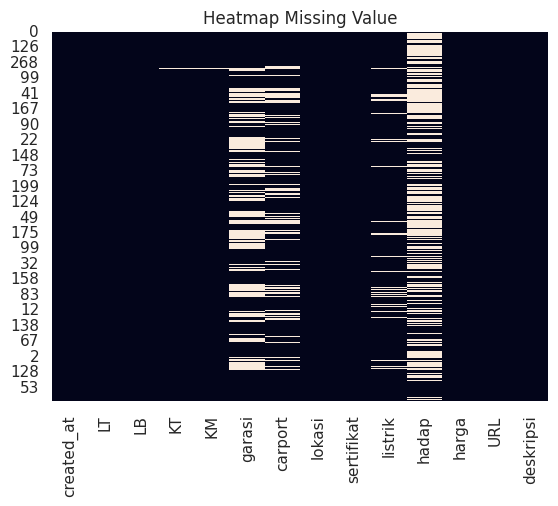

In [ ]:
# Melihat missing value dalam heatmap
sns.heatmap(combined_data.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
combined_dataA = combined_data.dropna(subset=['LT'])
print(combined_dataA.isnull().sum())

created_at       1
LT               0
LB               2
KT               3
KM               5
garasi        1048
carport        544
lokasi           1
sertifikat      10
listrik        224
hadap         1623
harga            3
URL              4
deskripsi       25
dtype: int64


In [ ]:
combined_dataB = combined_dataA.dropna(subset=['LB', 'KT', 'KM', 'lokasi', 'sertifikat', 'harga'])
print(combined_dataB.isnull().sum())

created_at       0
LT               0
LB               0
KT               0
KM               0
garasi        1040
carport        533
lokasi           0
sertifikat       0
listrik        218
hadap         1610
harga            0
URL              1
deskripsi       22
dtype: int64


In [ ]:
combined_dataC = combined_dataB.drop(columns=['hadap'])
print(combined_dataC.isnull().sum())

created_at       0
LT               0
LB               0
KT               0
KM               0
garasi        1040
carport        533
lokasi           0
sertifikat       0
listrik        218
harga            0
URL              1
deskripsi       22
dtype: int64


In [ ]:
# Mencari mean dari variabel listrik
# Ubah tipe data kolom 'listrik' menjadi numerik
combined_dataC['listrik'] = pd.to_numeric(combined_dataC['listrik'], errors='coerce')

# Menghitung modus
mode_listrik = combined_dataC['listrik'].mode()[0]
mode_listrik

2200.0

In [ ]:
# Mengisi nilai yang hilang dengan modus
combined_dataC['listrik'].fillna(mode_listrik, inplace=True)

print("Nilai yang hilang di variabel 'listrik' telah diganti dengan modus.")

Nilai yang hilang di variabel 'listrik' telah diganti dengan modus.


In [ ]:
print(combined_dataC.isnull().sum())

created_at       0
LT               0
LB               0
KT               0
KM               0
garasi        1040
carport        533
lokasi           0
sertifikat       0
listrik          0
harga            0
URL              1
deskripsi       22
dtype: int64


In [ ]:
combined_dataC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2993 non-null   datetime64[ns]
 1   LT          2993 non-null   object        
 2   LB          2993 non-null   float64       
 3   KT          2993 non-null   object        
 4   KM          2993 non-null   object        
 5   garasi      1953 non-null   object        
 6   carport     2460 non-null   object        
 7   lokasi      2993 non-null   category      
 8   sertifikat  2993 non-null   category      
 9   listrik     2993 non-null   float64       
 10  harga       2993 non-null   object        
 11  URL         2992 non-null   object        
 12  deskripsi   2971 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(2), object(8)
memory usage: 311.4+ KB


In [ ]:
# Lihat 10 baris sembarang dari DataFrame
sample_data = combined_dataC.sample(10)

print(sample_data)


    created_at     LT     LB   KT   KM garasi carport  \
256 2023-09-13     72   63.0    2    1      0       1   
27  2021-12-06  132.0  132.0    3    3    NaN     NaN   
102 2023-06-06    271  200.0    5    4      1       1   
167 2023-07-06    106  180.0    5    2    0.0     1.0   
49  2021-09-30  166.0  400.0    5    5    NaN     NaN   
9   2021-12-06    160  160.0    3    2    NaN     NaN   
78  2021-08-12     81   45.0    2    1    1.0     1.0   
151 2023-09-18    132  162.0  4.0  4.0    NaN     NaN   
36  2021-06-12     60   60.0    1  1.0    NaN     1.0   
59  2021-11-22    489  375.0  3.0  5.0    4.0     NaN   

                           lokasi sertifikat  listrik         harga  \
256                      Cibinong        SHM   1300.0     515000000   
27                       Kenjeran        SHM   2200.0    1720000000   
102            Tamalate, Makassar        SHM   1300.0    1000000000   
167                      Pamulang        SHM   2200.0     799000000   
49               

In [ ]:
var = ['garasi', 'carport']

for i in var:
   combined_dataC[i] = combined_dataC[i].replace(r'-', np.nan, regex = True)
   combined_dataC[i].fillna(value = 0, inplace = True)

combined_dataC.isna().sum()

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi         0
carport        0
lokasi         0
sertifikat     0
listrik        0
harga          0
URL            1
deskripsi     22
dtype: int64

In [ ]:
# Ubah tipe data kolom 'garasi', 'carport' menjadi int
for col in ['garasi', 'carport']:
    combined_dataC[col] = combined_dataC[col].astype(int)

In [ ]:
combined_dataC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  2993 non-null   datetime64[ns]
 1   LT          2993 non-null   object        
 2   LB          2993 non-null   float64       
 3   KT          2993 non-null   object        
 4   KM          2993 non-null   object        
 5   garasi      2993 non-null   int64         
 6   carport     2993 non-null   int64         
 7   lokasi      2993 non-null   category      
 8   sertifikat  2993 non-null   category      
 9   listrik     2993 non-null   float64       
 10  harga       2993 non-null   object        
 11  URL         2992 non-null   object        
 12  deskripsi   2971 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 311.4+ KB


In [ ]:
# Saving the preprocessed Data for future use/analysis
import os
os.makedirs('data', exist_ok=True)
combined_dataC.to_csv("data/combined_PreProcessedC.csv", encoding='utf8', index=False)

In [ ]:
cols = ['LT', 'KT', 'KM', 'harga']
for col in cols:
    print(f"Jumlah '-' di kolom {col}: ", (combined_dataC[col] == '-').sum())

Jumlah '-' di kolom LT:  0
Jumlah '-' di kolom KT:  4
Jumlah '-' di kolom KM:  1
Jumlah '-' di kolom harga:  0


In [ ]:
combined_dataC['KT'] = combined_dataC['KT'].replace('-', '0')
combined_dataC['KM'] = combined_dataC['KM'].replace('-', '0')

In [ ]:
# Ubah tipe data kolom 'LT', 'LB', 'KT', 'KM', menjadi int
for col in ['LT', 'LB','KT', 'KM']:
    combined_dataC[col] = combined_dataC[col].astype(int)

In [ ]:
combined_dataC.dtypes

created_at    datetime64[ns]
LT                     int64
LB                     int64
KT                     int64
KM                     int64
garasi                 int64
carport                int64
lokasi              category
sertifikat          category
listrik              float64
harga                 object
URL                   object
deskripsi             object
dtype: object

In [ ]:
print(combined_dataC['harga'].describe())


count           2993
unique           892
top       1500000000
freq              54
Name: harga, dtype: int64


In [ ]:
non_numeric = combined_dataC['harga'].apply(lambda x: not str(x).isnumeric())
print(combined_dataC[non_numeric])

   created_at   LT    LB  KT  KM  garasi  carport  \
0  2021-01-12  999   300   2   1       0        0   
1  2021-01-12  300    84   3   2       0        0   
2  2021-01-12  949   341   2   1       0        0   
3  2021-01-12  696   341   2   1       1        1   
4  2021-01-12   90    60   1   1       0        0   
..        ...  ...   ...  ..  ..     ...      ...   
95 2021-10-29  719  1124   7   8       7        7   
96 2021-10-29   90    45   0   1       0        1   
97 2021-10-22  800   400   4   5       0        0   
98 2021-10-15   55   150   2   1       1        1   
99 2021-10-15  180   100   3   2       0        0   

                                          lokasi sertifikat  listrik  \
0   Gunung Bahagia, Balikpapan, Kalimantan Timur        HGB    900.0   
1                   Balikpapan Utara, Balikpapan        SHM   1300.0   
2                     Gunung Bahagia, Balikpapan        HGB    900.0   
3                     Gunung Bahagia, Balikpapan        HGB    900.0   
4  

In [ ]:
combined_dataD = combined_dataC.copy()

In [ ]:
# Menghapus 'RP. ' dan '.' lalu mengubah string menjadi integer
combined_dataD['harga'] = combined_dataD['harga'].apply(lambda x: x.replace('Rp. ', '').replace('.', '').replace('Rp', '').replace('RP ', '') if isinstance(x, str) else x)

# Mengubah float menjadi integer dengan menghilangkan angka setelah titik
combined_dataD['harga'] = combined_dataD['harga'].apply(lambda x: int(x) if isinstance(x, float) else x)

In [ ]:
print(combined_dataD['harga'])

0       692550000
1       811400000
2       900500000
3      1001900000
4      1200800000
          ...    
160    2300000000
161     675000000
162     348000000
163     175000000
164     600000000
Name: harga, Length: 2993, dtype: object


In [ ]:
# Ubah tipe data kolom  'listrik', 'harga' menjadi int
for col in ['listrik', 'harga']:
    combined_dataD[col] = combined_dataD[col].astype(int)

In [ ]:
combined_dataD.dtypes

created_at    datetime64[ns]
LT                     int64
LB                     int64
KT                     int64
KM                     int64
garasi                 int64
carport                int64
lokasi              category
sertifikat          category
listrik                int64
harga                  int64
URL                   object
deskripsi             object
dtype: object

In [ ]:
# Saving the preprocessed Data for future use/analysis
import os
os.makedirs('data', exist_ok=True)
combined_dataD.to_csv("data/combined_PreProcessedD.csv", encoding='utf8', index=False)

#**Cek Noise dan Outlier**

<Axes: >

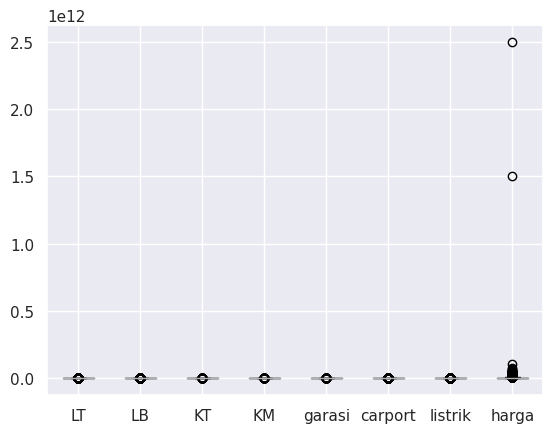

In [ ]:
#Cek noise
combined_dataD.boxplot()

<Axes: >

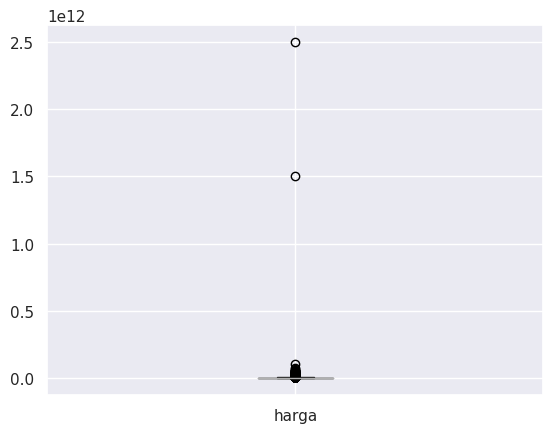

In [ ]:
combined_dataD.boxplot(column=['harga'])

In [ ]:
print(np.where(combined_dataD['harga']>1000000000000))

(array([2045, 2626]),)


In [ ]:
#Cek harga rumah pertama

combined_dataD.iloc[2045,11]

'https://www.rumah.com/listing-properti/dijual-samera-djohor-oleh-steven-19272779'

In [ ]:
#Link sudah tidak ada, akan dicek harga rumah kedua

combined_dataD.iloc[2626,11]

'https://www.rumah123.com/properti/semarapura/hos12342924/'

In [ ]:
#Harga salah, ganti harga sesuai url

combined_dataD.iloc[2626,10] = 2500000000

In [ ]:
#Karena harga tersebut menyebabkan adanya outlier, maka kami memutuskan untuk menghapus data
combined_dataD.drop(combined_dataD[combined_dataD['harga'] == 2500000000000].index , inplace=True)
combined_dataD.drop(combined_dataD[combined_dataD['harga'] == 1500000000000].index , inplace=True)

<Axes: >

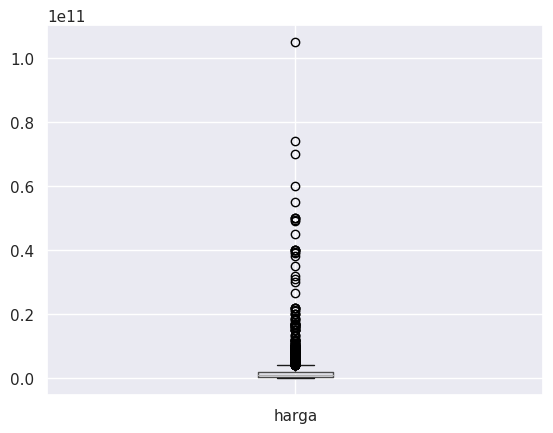

In [ ]:
combined_dataD.boxplot(column=['harga'])

<Axes: >

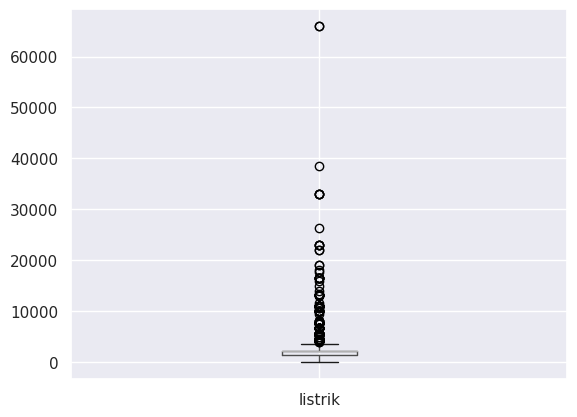

In [ ]:
combined_dataD.boxplot(column=['listrik'])

In [ ]:
print(np.where(combined_dataD['listrik']>60000))

(array([1269, 2026]),)


In [ ]:
combined_dataD.iloc[1276,11]

'https://rumahdijual.com/tebet/1914317-dijual-rumah-hitung-tanah-menteng-cikini-lokasi-kawasan-bisnis.html'

In [ ]:
#Link sebelumnya tidak ada, cek link kedua

combined_dataD.iloc[2036,11]

'https://www.rumah.com/listing-properti/dijual-rumah-konsep-spanyol-pertama-di-medan-oleh-steven-19315657'

<Axes: >

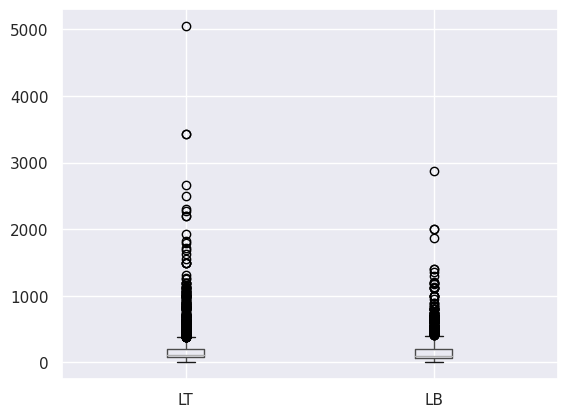

In [ ]:
combined_dataD.boxplot(column=['LT', 'LB'])

In [ ]:
print(np.where(combined_dataD['LT']>4000))

(array([2599]),)


In [ ]:
combined_dataD.iloc[2612,11]

'https://www.rumah.com/listing-properti/dijual-modern-house-with-ocean-view-in-nusa-dua-siligita-oleh-henry-setiono-22200295'

In [ ]:
print(np.where(combined_dataD['LB']>2500))

(array([2601]),)


In [ ]:
combined_dataD.iloc[2614,11]

'https://www.rumah123.com/properti/gunung-kidul/hos9291517/'

<Axes: >

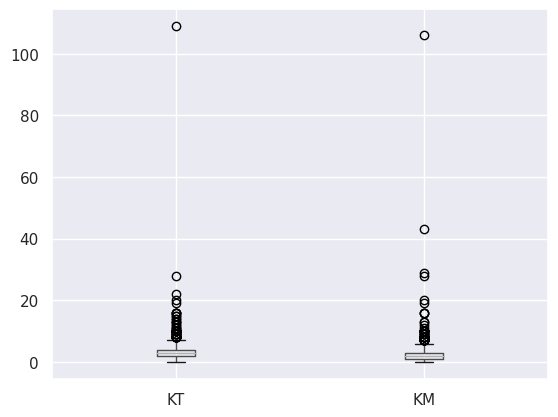

In [ ]:
combined_dataD.boxplot(column=['KT', 'KM'])

In [ ]:
print(np.where(combined_dataD['KT']>100))

(array([280]),)


In [ ]:
combined_dataD.iloc[282,11]

'https://rumahdijual.com/lampung/11715397-perumahan-2-kamar-tipe-subsidi-di-bandar-lampung.html'

In [ ]:
print(np.where(combined_dataD['KM']>100))

(array([280]),)


<Axes: >

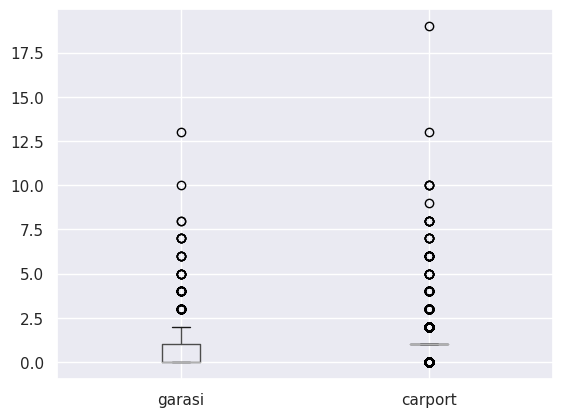

In [ ]:
combined_dataD.boxplot(column=['garasi', 'carport'])

In [ ]:
print(np.where(combined_dataD['carport']>17.5))

(array([2796]),)


In [ ]:
combined_dataD.iloc[2810,11]

'https://www.rumah123.com/properti/sleman/hos14854817/'

In [ ]:
Q1 = combined_dataD['harga'].quantile(0.25)
Q3 = combined_dataD['harga'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifikasi outlier tiap kolom
outliers = ((combined_dataD['harga'] < lower_bound) | (combined_dataD['harga'] > upper_bound))

#Dataframe outlier
combined_noout = combined_dataD[outliers]

#Hapus outlier dari dataframe sebelumnya
combined_dataE = combined_dataD[~outliers]

In [ ]:
# Saving the preprocessed Data for future use/analysis (no outlier)
import os
os.makedirs('data', exist_ok=True)
combined_dataE.to_csv("data/combined_PreProcessedD.csv", encoding='utf8', index=False)

In [ ]:
# Saving the outlier data
import os
os.makedirs('data', exist_ok=True)
combined_noout.to_csv("data/combined_PreProcessedD.csv", encoding='utf8', index=False)

In [ ]:
combined_dataD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
1,2021-06-12,60,40,1,1,0,1,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-06-12,60,50,2,2,0,1,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-06-12,60,70,3,2,0,1,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-06-12,90,60,3,2,0,2,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
5,2021-06-12,120,70,3,2,0,2,Babakan Madang,SHM,2200,1538200000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2023-09-19,1030,467,2,1,0,1,"Malalayang, Manado",SHM,2200,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
161,2023-09-18,96,96,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
162,2023-09-17,115,45,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
163,2023-09-14,102,72,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


In [ ]:
# Misalkan kita memiliki daftar lokasi yang termasuk dalam wilayah Bogor
lokasi_Bogor = area1['lokasi'].tolist()
lokasi_Lampung_SumSel = area2['lokasi'].tolist()
lokasi_Kalimantan = area3['lokasi'].tolist()
lokasi_Semarang = area4['lokasi'].tolist()
lokasi_Depok = area5['lokasi'].tolist()
lokasi_Tangerang = area6['lokasi'].tolist()
lokasi_Jakarta = area7['lokasi'].tolist()
lokasi_Padang_Palembang = area8['lokasi'].tolist()
lokasi_Bekasi = area9['lokasi'].tolist()
lokasi_Bandung = area10['lokasi'].tolist()
lokasi_Medan = area11['lokasi'].tolist()
lokasi_Surabaya = area12['lokasi'].tolist()
lokasi_Bali = area13['lokasi'].tolist()
lokasi_Yogyakarta = area14['lokasi'].tolist()
lokasi_Sulawesi = area15['lokasi'].tolist()

combined_dataD['wilayah'] = combined_dataD['lokasi'].apply(lambda x: 'Bogor' if x in lokasi_Bogor else
                                                            'Lampung_SumSel' if x in lokasi_Lampung_SumSel else
                                                            'Semarang' if x in lokasi_Semarang else
                                                            'Kalimantan' if x in lokasi_Kalimantan else
                                                            'Depok' if x in lokasi_Depok else
                                                            'Tangerang' if x in lokasi_Tangerang else
                                                            'Jakarta' if x in lokasi_Jakarta else
                                                            'Bekasi' if x in lokasi_Bekasi else
                                                            'Padang_Palembang' if x in lokasi_Padang_Palembang else
                                                            'Bandung' if x in lokasi_Bandung else
                                                            'Medan' if x in lokasi_Medan else
                                                            'Surabaya' if x in lokasi_Surabaya else
                                                            'Yogyakarta' if x in lokasi_Yogyakarta else
                                                            'Bali' if x in lokasi_Bali else
                                                            'Sulawesi' if x in lokasi_Sulawesi else x)


In [ ]:
combined_dataD.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,wilayah
1,2021-06-12,60,40,1,1,0,1,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
2,2021-06-12,60,50,2,2,0,1,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
3,2021-06-12,60,70,3,2,0,1,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
4,2021-06-12,90,60,3,2,0,2,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
5,2021-06-12,120,70,3,2,0,2,Babakan Madang,SHM,2200,1538200000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor


In [ ]:
# Saving the preprocessed Data for future use/analysis
import os
os.makedirs('data', exist_ok=True)
combined_dataD.to_csv("data/combined_PreProcessedDFinal.csv", encoding='utf8', index=False)

#**1. Kualitas data yang dimiliki perusahaan**

Data yang dimiliki oleh PT Ray Pink Property Indonesia (RPPI) kurang baik karena
1. Terdapat missing value pada semua variabel di data, dengan jumlah terbanyak sebagai berikut :
  *   Variabel "hadap" sebanyak 1624 data
  *   Variabel "garasi" sebanyak 1049 data
  *   Varibel "carport" sebanyak 545 data
  *   Variabel "listrik" sebanyak 225 data
2. Terdapat duplikat data sebanyak 14 buah
3. Terdapat banyak outlier pada data
4. Terdapat data yang tidak sesuai dengan tipe data

  Variabel LT, LB, KT, dan KM yang seharusnya memiliki tipe data integer, tetapi dalam data, mereka memiliki tipe data objek.
5. Ketidakkonsistenan nilai dalam suatu variabel

  Pada variabel 'harga' terdapat nilai yang diawali dengan RP, Rp, dan ada juga yang langsung menulis harganya.

Meskipun demikian, menurut kami variabel-variabel yang dimiliki sudah cukup baik untuk merepresentasikan karakteristik rumah dari masing-masing wilayah.



#**2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul**
Saran yang kami berikan untuk perbaikan data perusahaan RPPI
1. Analisis data yang lebih teliti

  Lakukan analisis data yang lebih teliti untuk mengidentifikasi missing value dan outlier. Ketahui seberapa sering mereka muncul dan di mana mereka terkonsentrasi.
2. Melakukan penanganan outlier

  Identifikasi penyebab outlier dan pertimbangkan apakah mereka merupakan kesalahan data atau informasi yang berharga. Jika outlier adalah kesalahan data, pertimbangkan untuk menghapus atau mengoreksi data tersebut. Jika outlier adalah informasi yang berharga, pertimbangkan untuk menyelidiki lebih lanjut atau menerapkan metode analisis yang lebih tahan terhadap outlier.
3. Validasi data yang masuk

  Pertimbangkan untuk memperkuat proses validasi data saat data baru masuk ke sistem perusahaan Anda. Ini dapat membantu mencegah data yang salah atau tidak valid masuk ke dalam sistem.
4. Pelatihan karyawan
  
  Berikan pelatihan kepada karyawan yang terlibat dalam pengumpulan dan pemrosesan data agar mereka dapat mengenali masalah seperti outlier dan missing value serta tahu bagaimana cara mengatasinya.
5. Monitoring terus-menerus
  
  Buat sistem pemantauan yang terus-menerus untuk mendeteksi masalah data baru segera setelah mereka muncul.

Selain itu, Perusahaan seharusnya terus memperkaya data dengan beberapa aspek penting lain dari properti, seperti:

1. Data Demografis: Informasi tentang karakteristik penduduk di area properti, seperti usia, jenis kelamin, pendapatan, dan tingkat pendidikan. Data ini dapat membantu memahami profil konsumen potensial.
2. Data Geografis: Informasi tentang lokasi geografis properti, seperti jarak ke pusat kota, akses ke transportasi umum, dan keberadaan fasilitas publik seperti sekolah, rumah sakit, dan pusat perbelanjaan.
(beberapa data sudah memberikan informasi ini di deskripsi, tapi sebaiknya data terkait hal ini dapat dibuat sistematis agar dapat dilakukan pengolahan lebih lanjut)
3. Data Historis: Informasi tentang perubahan harga properti sepanjang waktu dan data penjualan properti sebelumnya di area yang sama.
4. Data Kepuasan Pelanggan: Feedback dan ulasan dari pelanggan yang telah membeli properti dapat memberikan wawasan tentang kualitas produk dan layanan.

Dengan data tersebut, perusahaan dapat melakukan berbagai analisis yang mendalam untuk mengetahui tren pasar yang sedang berlaku. Analisis ini memungkinkan perusahaan untuk lebih memahami kebutuhan dan preferensi pelanggan. Dengan pemahaman yang lebih baik ini, perusahaan dapat merancang dan menawarkan produk atau layanan yang lebih sesuai dengan kebutuhan pelanggan, sehingga dapat memaksimalkan kepuasan pelanggan dan meningkatkan kinerja bisnis.


# **3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?**

In [ ]:
#perbandingan harga rumah di setiap lokasi
import plotly.express as px
harga = px.box(combined_dataD, x="wilayah", y="harga")
harga.update_layout(boxmode="overlay", boxgap=1)


harga.show()

Berdasarkan px.box di atas, diperoleh median harga rumah dari masing-masing wilayah
* Bogor 825 jt
* Lampung 630 jt
* Kalimantan 975 jt
* Semarang 1.11 milyar
* Jakarta 2.1 milyar
* Padang_Palembang 1.1 milyar
* Bekasi 910 jt
* Bandung 1.175 milyar
* Medan 800 jt
* Surabaya 2 milyar
* Bali 1.6 milyar
* Yogyakarta 1.75 milyar
* Sulawesi 897,5 jt

**Kesimpulan**
*   Wilayah yang memiliki harga cenderung lebih murah adalah Bekasi
*   Wilayah yang memiliki harga cenderung lebih mahal adalah Jakarta, dimana bisa diilihat pada px.box diatas sebaran harga rumah di Jakarta sangat beragam dan berada di atas rata-rata harga rumah di wilayah lainnya.

#**4. Rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana**

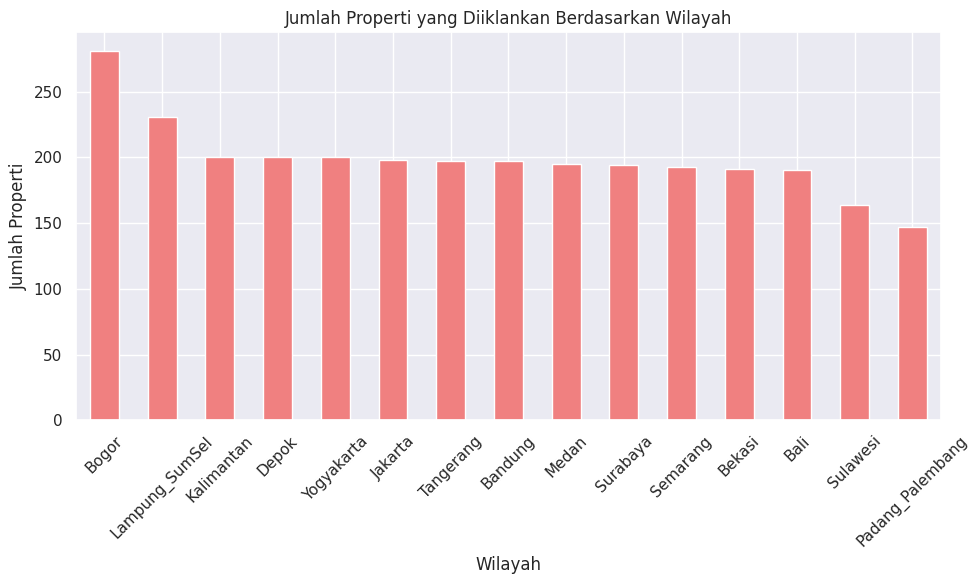

In [ ]:
# Menghitung jumlah properti yang diiklankan per wilayah
properti_per_wilayah = combined_dataD['wilayah'].value_counts()

# Memplot bar chart
plt.figure(figsize=(10, 6))
properti_per_wilayah.plot(kind='bar', color='lightcoral')
plt.title('Jumlah Properti yang Diiklankan Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Properti')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

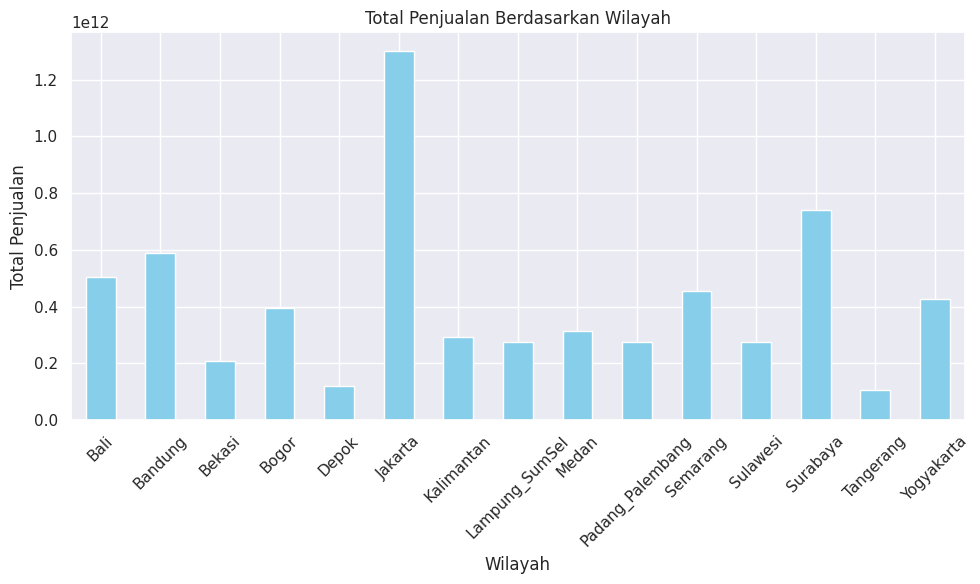

In [ ]:
#Mengelompokkan data berdasarkan wilayah dan menghitung total penjualan per wilayah
total_penjualan_per_wilayah = combined_dataD.groupby('wilayah')['harga'].sum()

# Memplot bar chart
plt.figure(figsize=(10, 6))
total_penjualan_per_wilayah.plot(kind='bar', color='skyblue')
plt.title('Total Penjualan Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kami merekomendasikan kepada PT Ray Pink Property Indonesia (RPPI) untuk membuka cabang di Kota Bogor, hal ini dikarenakan Kota Bogor adalah kota yang memiliki iklan penjualan terbanyak sehingga ada potensi pasar yang besar di kota tersebut.


**Alternatif**

Sebagai alternatif, kami merekomendasikan PT Ray Pink Property Indonesia (RPPI) untuk membuka cabang di Kota Medan, hal ini dikarenakan total penjualan terbesar berada di Kota Medan yang dapat diindikasikan adanya potensi pendapatan yang tinggi.

#**5. Rumah dengan karakteristik seperti apa yang paling banyak dijual**

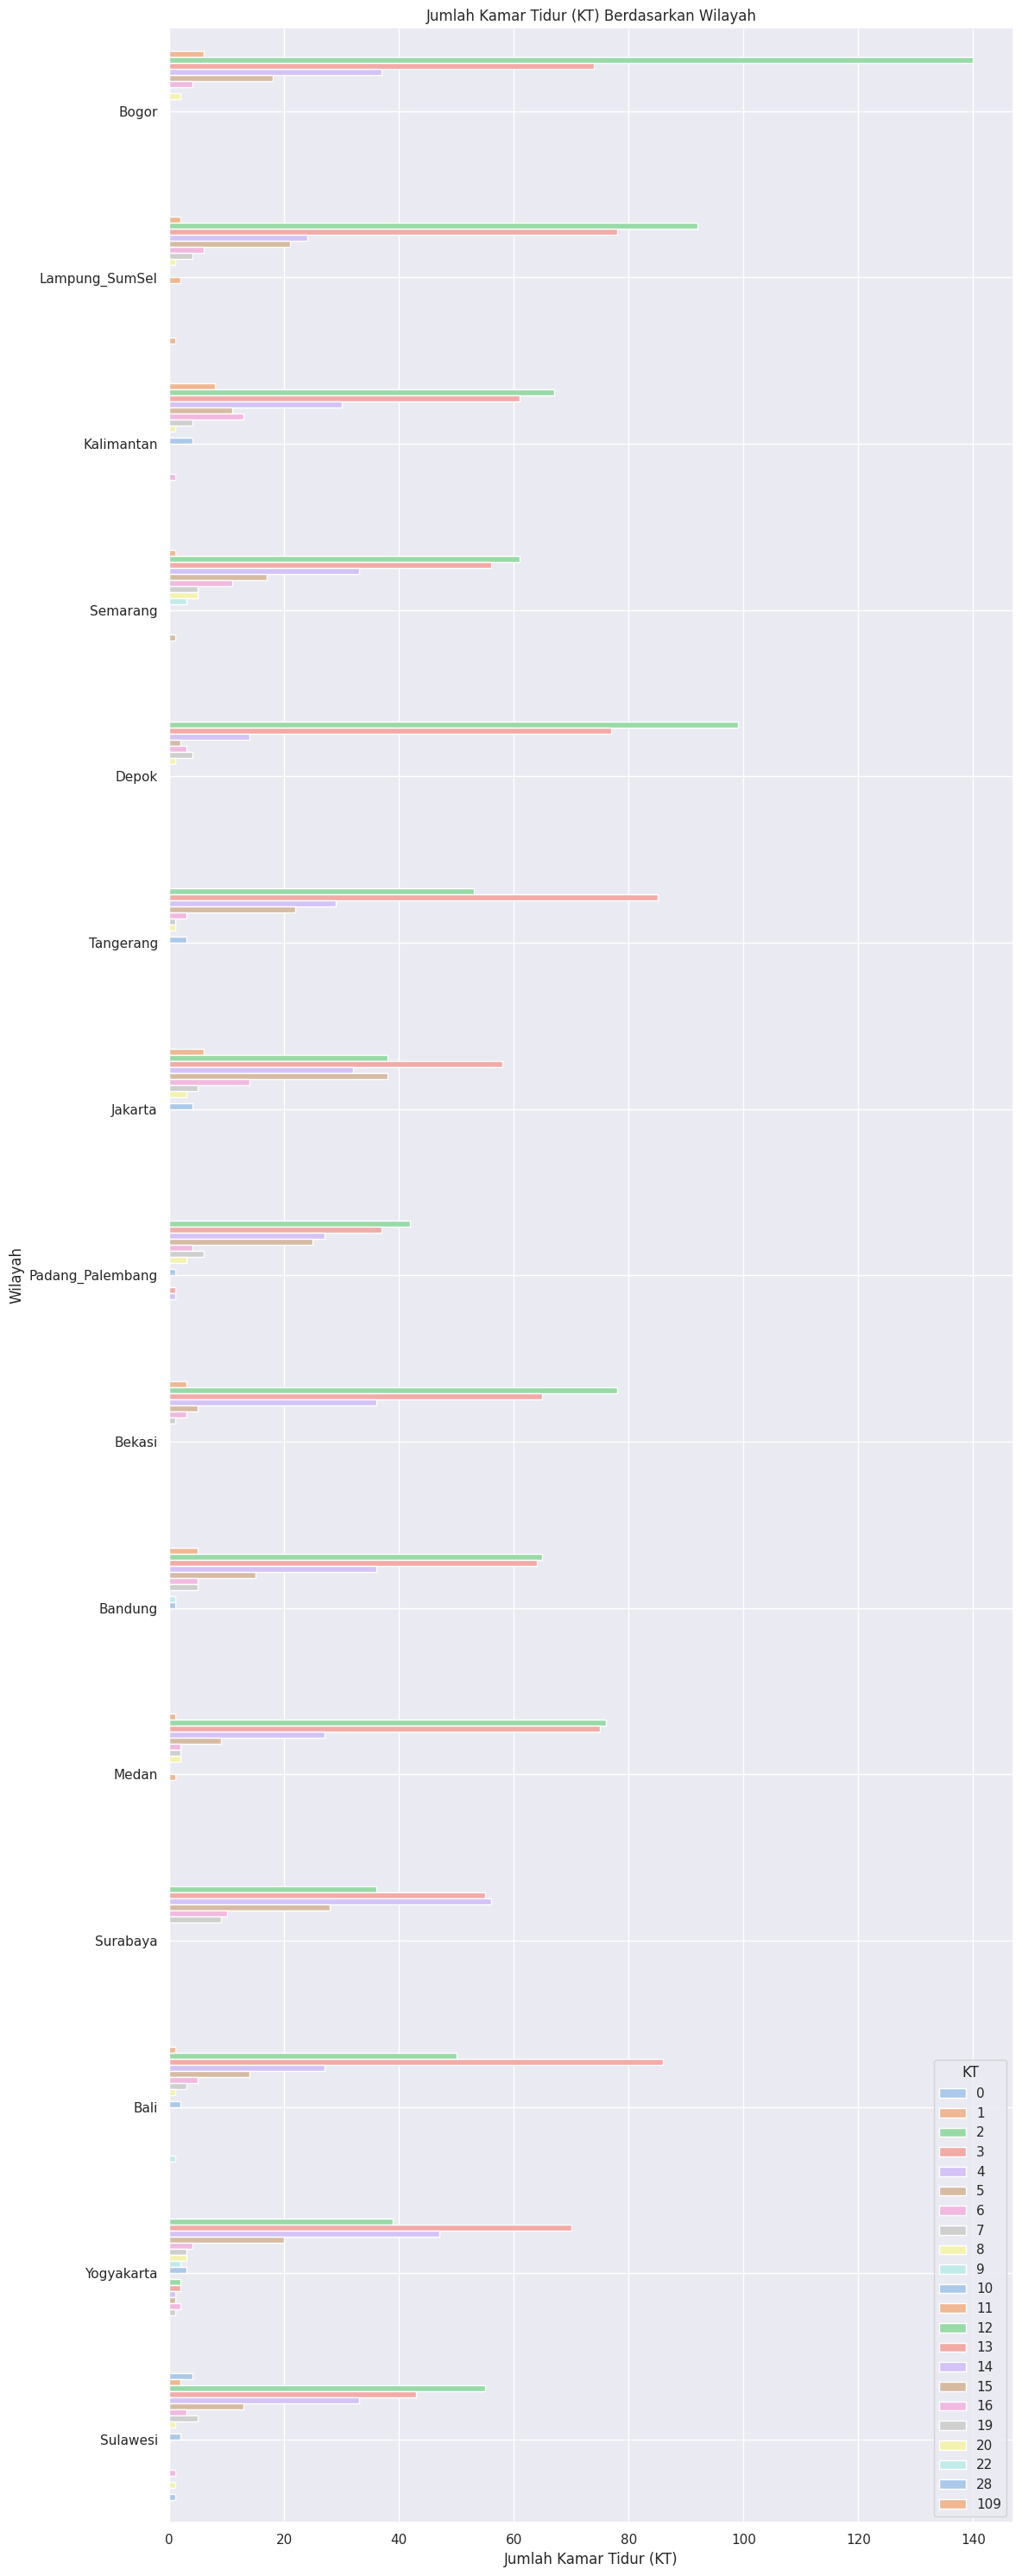

In [ ]:
#Jumlah Kamar Tidur
plt.figure(figsize=(12, 30))
sns.countplot(y='wilayah', hue='KT', palette='pastel', data=combined_dataD)
plt.xlabel('Jumlah Kamar Tidur (KT)')
plt.ylabel('Wilayah')
plt.title('Jumlah Kamar Tidur (KT) Berdasarkan Wilayah')
plt.legend(title='KT')
plt.grid(True)
plt.tight_layout()
plt.show()

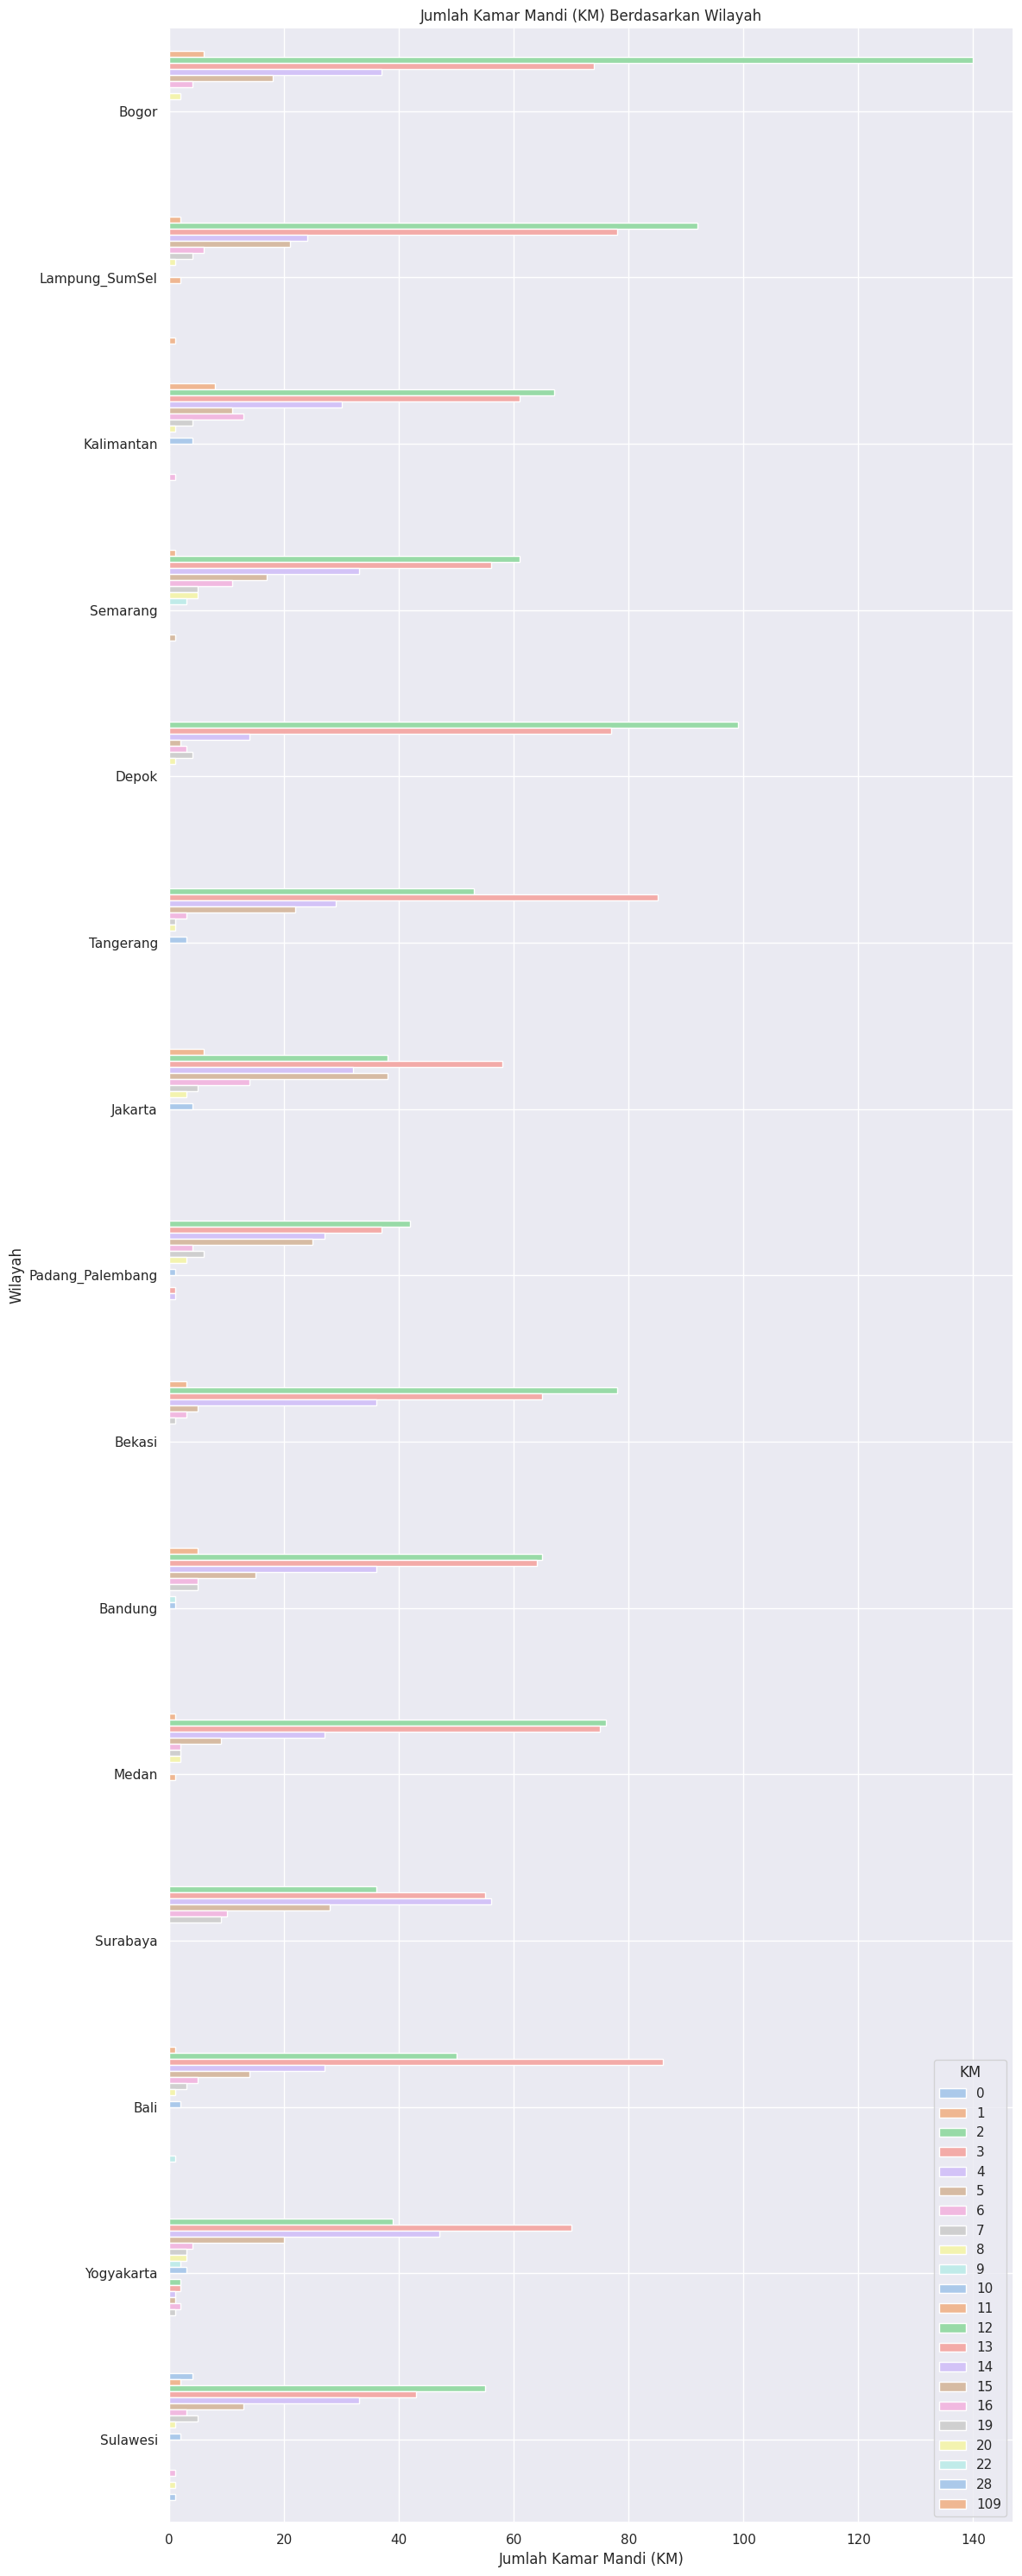

In [ ]:
#Jumlah Kamar Mandi
plt.figure(figsize=(12, 30))
sns.countplot(y='wilayah', hue='KT', palette='pastel', data=combined_dataD)
plt.xlabel('Jumlah Kamar Mandi (KM)')
plt.ylabel('Wilayah')
plt.title('Jumlah Kamar Mandi (KM) Berdasarkan Wilayah')
plt.legend(title='KM')
plt.grid(True)
plt.tight_layout()
plt.show()

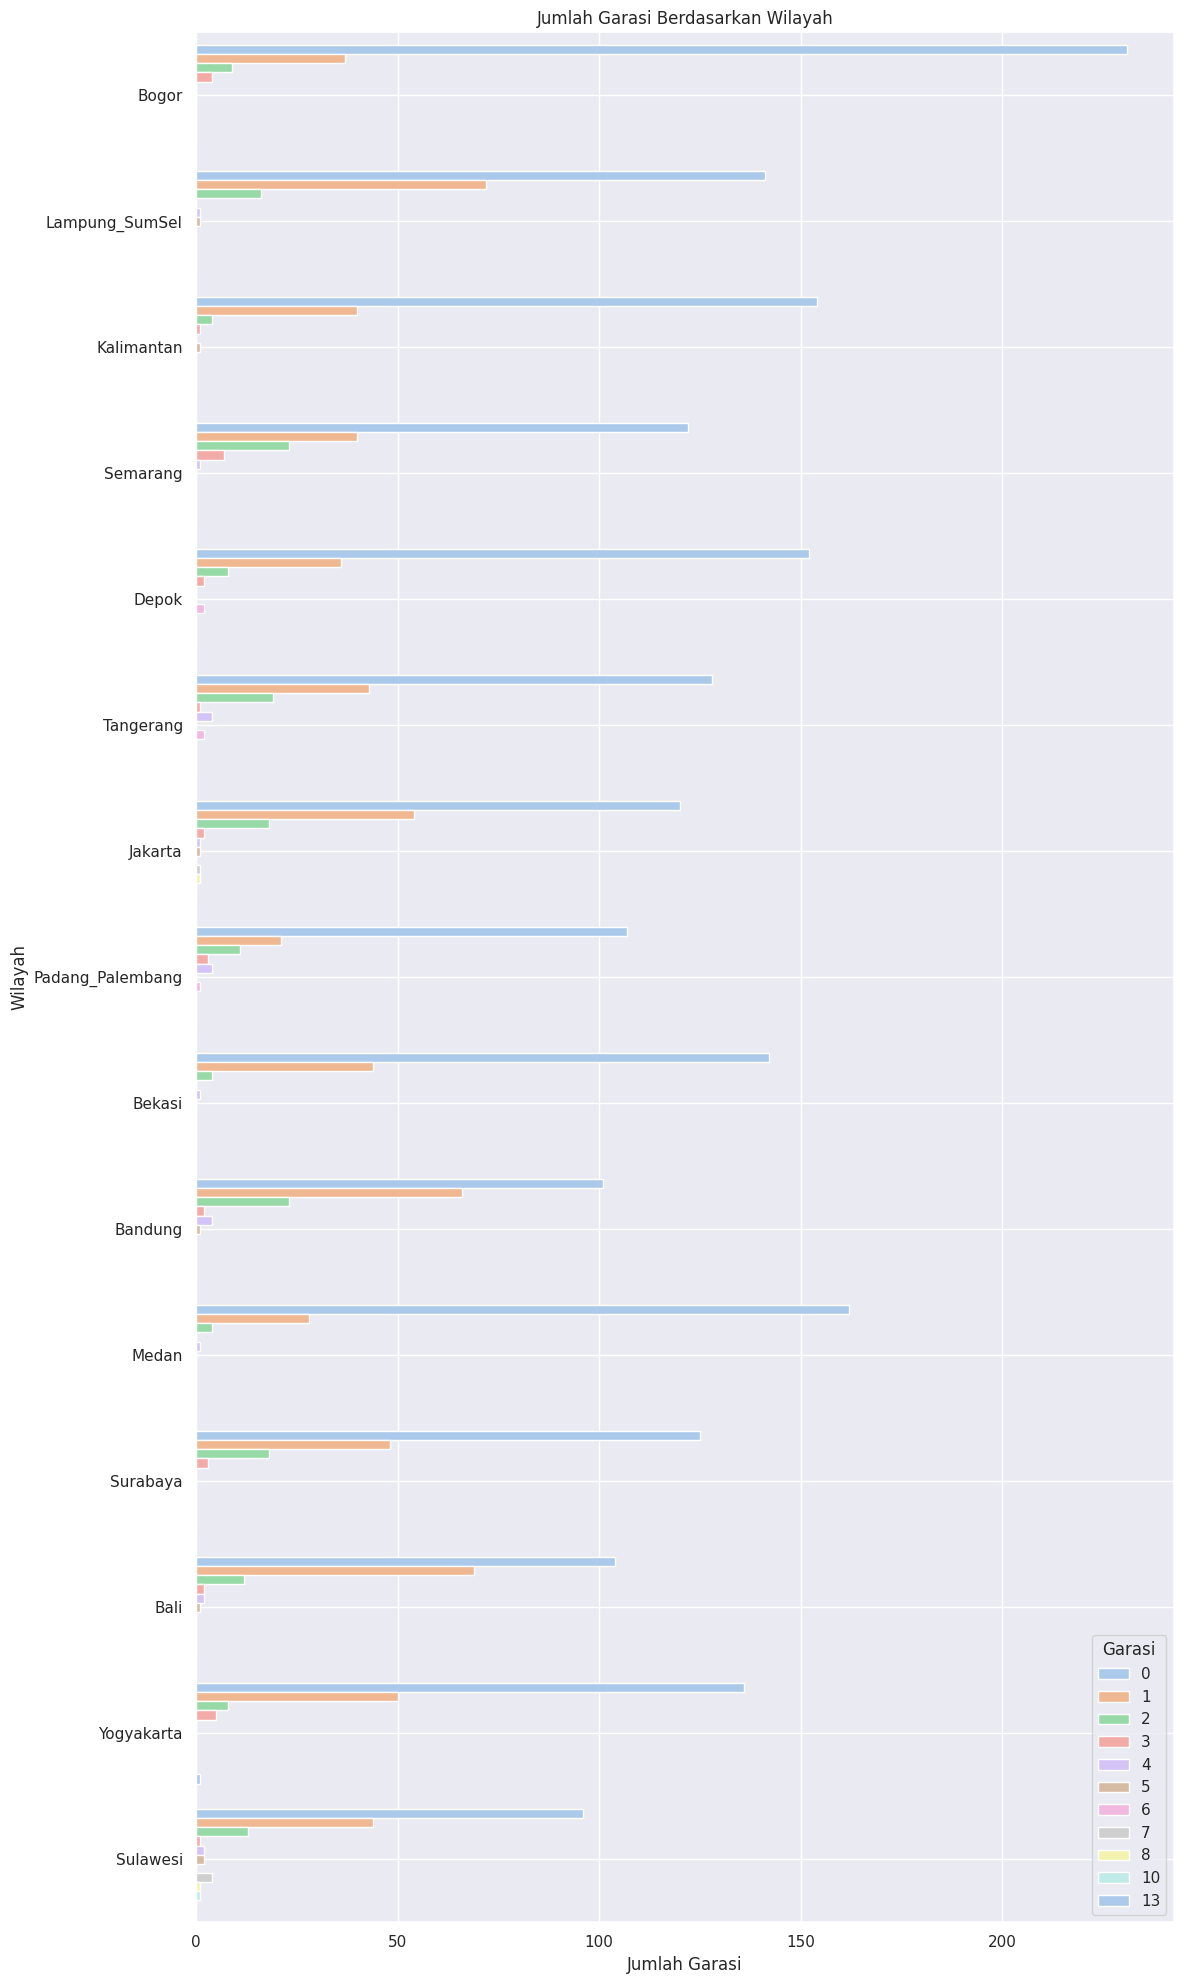

In [ ]:
#Jumlah Garasi
plt.figure(figsize=(12, 20))
sns.countplot(y='wilayah', hue='garasi', palette='pastel', data=combined_dataD)
plt.xlabel('Jumlah Garasi')
plt.ylabel('Wilayah')
plt.title('Jumlah Garasi Berdasarkan Wilayah')
plt.legend(title='Garasi')
plt.grid(True)
plt.tight_layout()
plt.show()

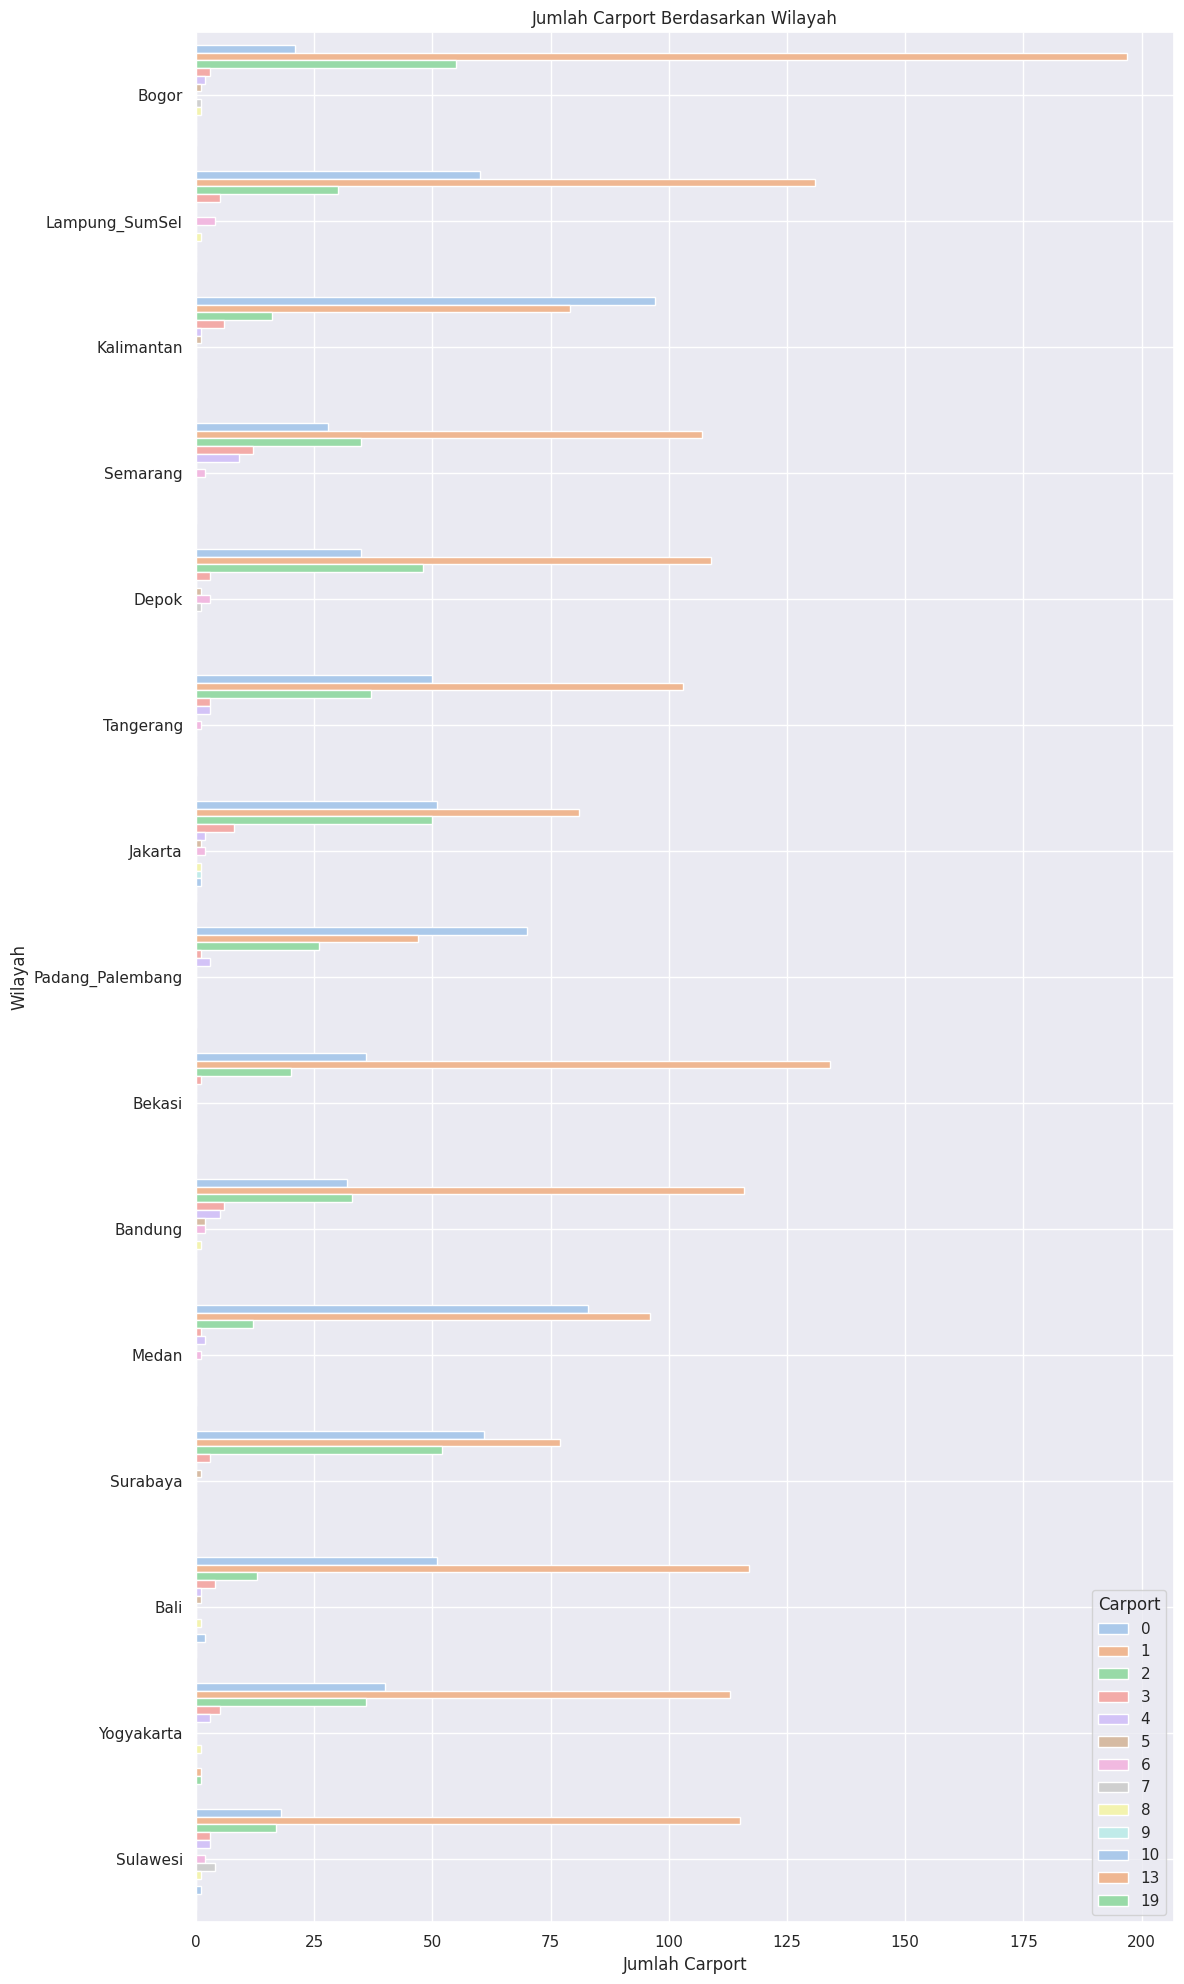

In [ ]:
#Jumlah Carport
plt.figure(figsize=(12, 20))
sns.countplot(y='wilayah', hue='carport', palette='pastel', data=combined_dataD)
plt.xlabel('Jumlah Carport')
plt.ylabel('Wilayah')
plt.title('Jumlah Carport Berdasarkan Wilayah')
plt.legend(title='Carport')
plt.grid(True)
plt.tight_layout()
plt.show()

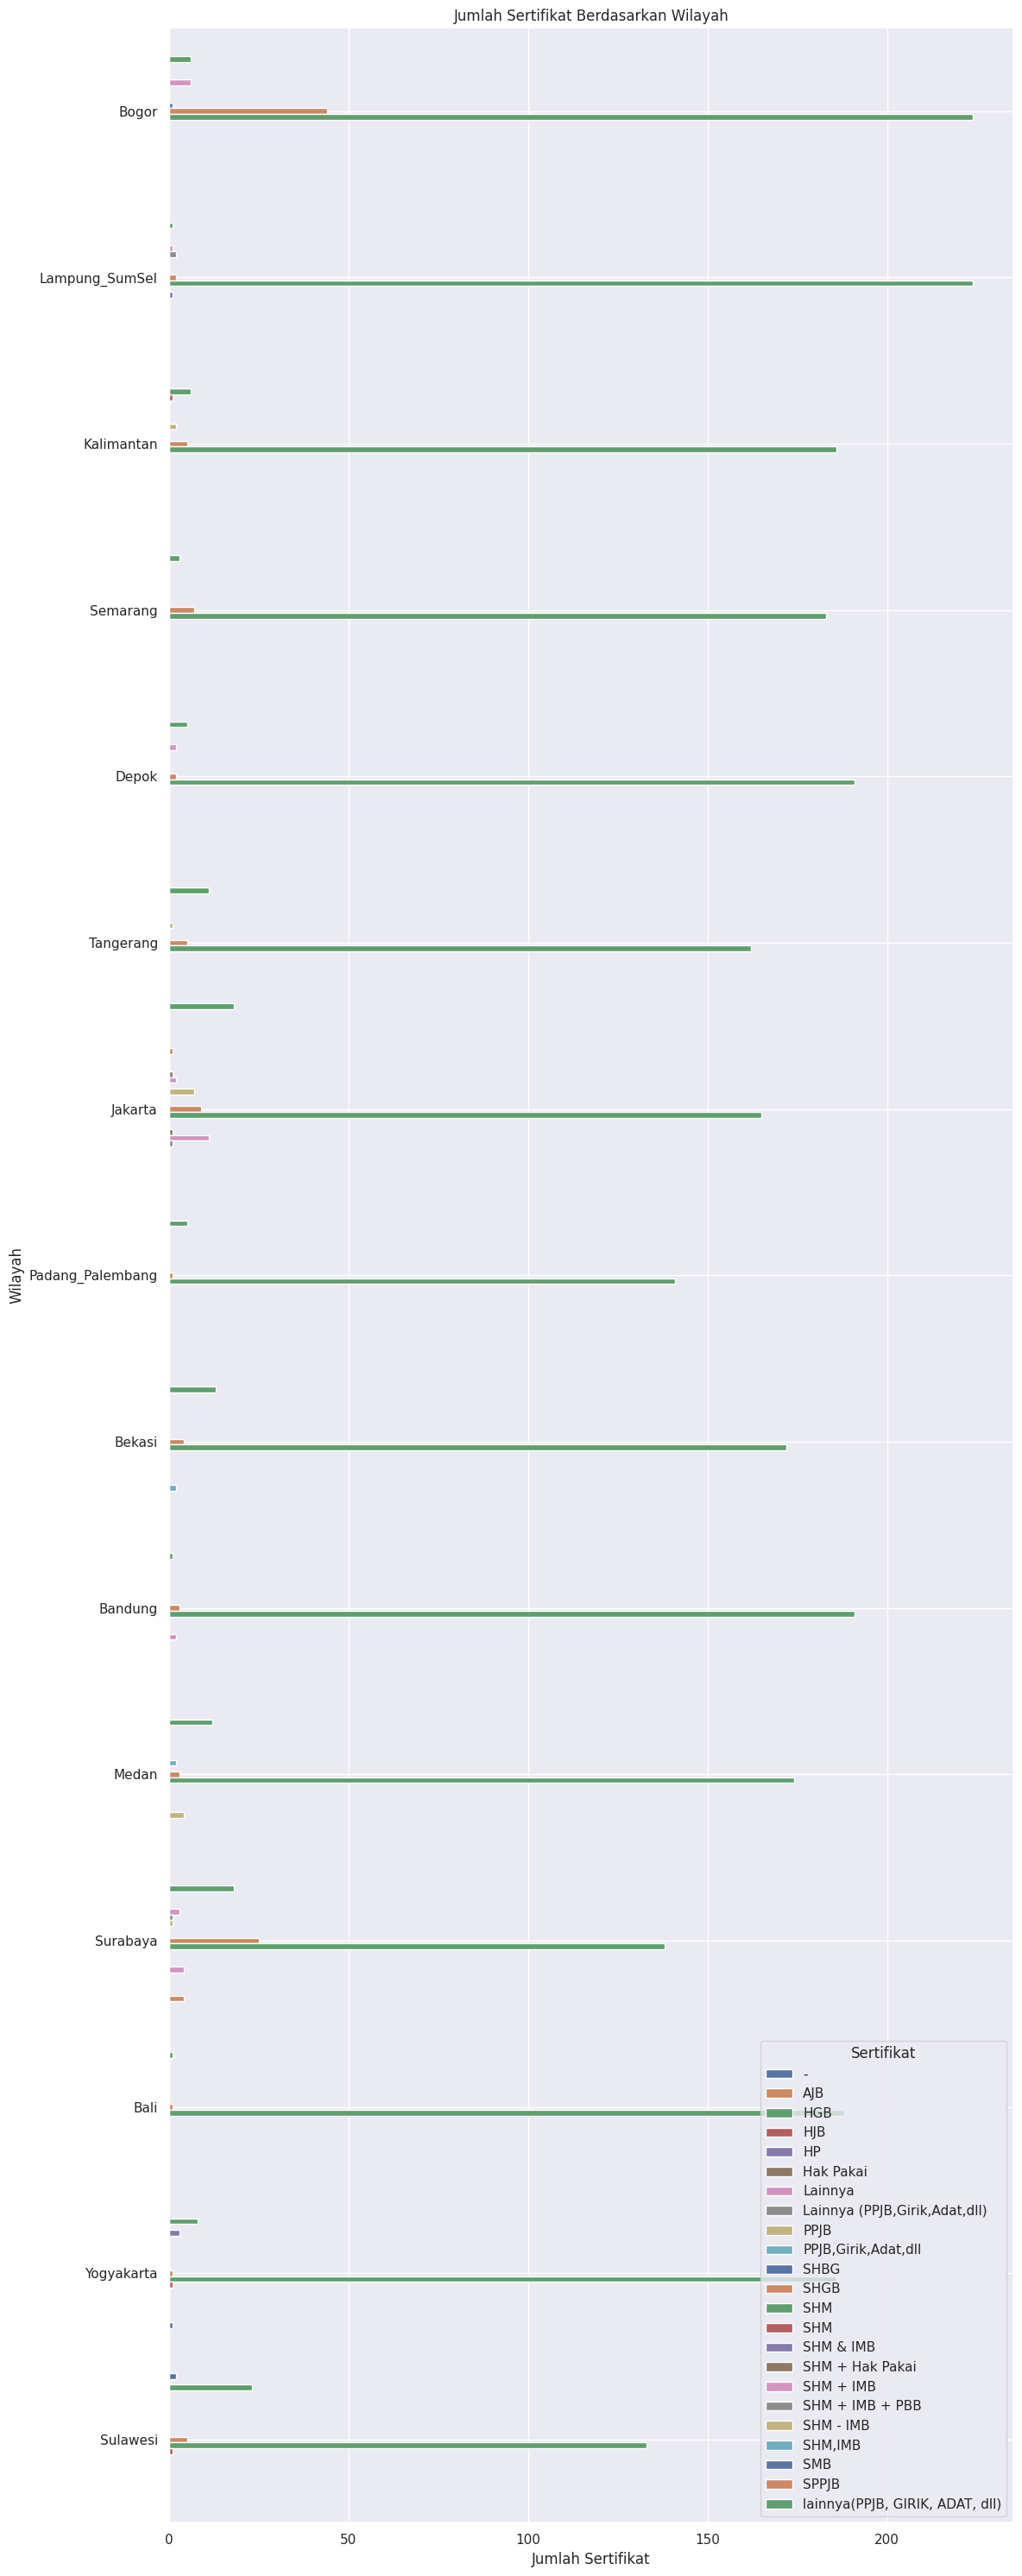

In [ ]:
#Jumlah Sertifikat
plt.figure(figsize=(12, 30))
sns.countplot(y='wilayah', hue='sertifikat', palette='deep', data=combined_dataD)
plt.xlabel('Jumlah Sertifikat')
plt.ylabel('Wilayah')
plt.title('Jumlah Sertifikat Berdasarkan Wilayah')
plt.legend(title='Sertifikat')
plt.grid(True)
plt.tight_layout()
plt.show()

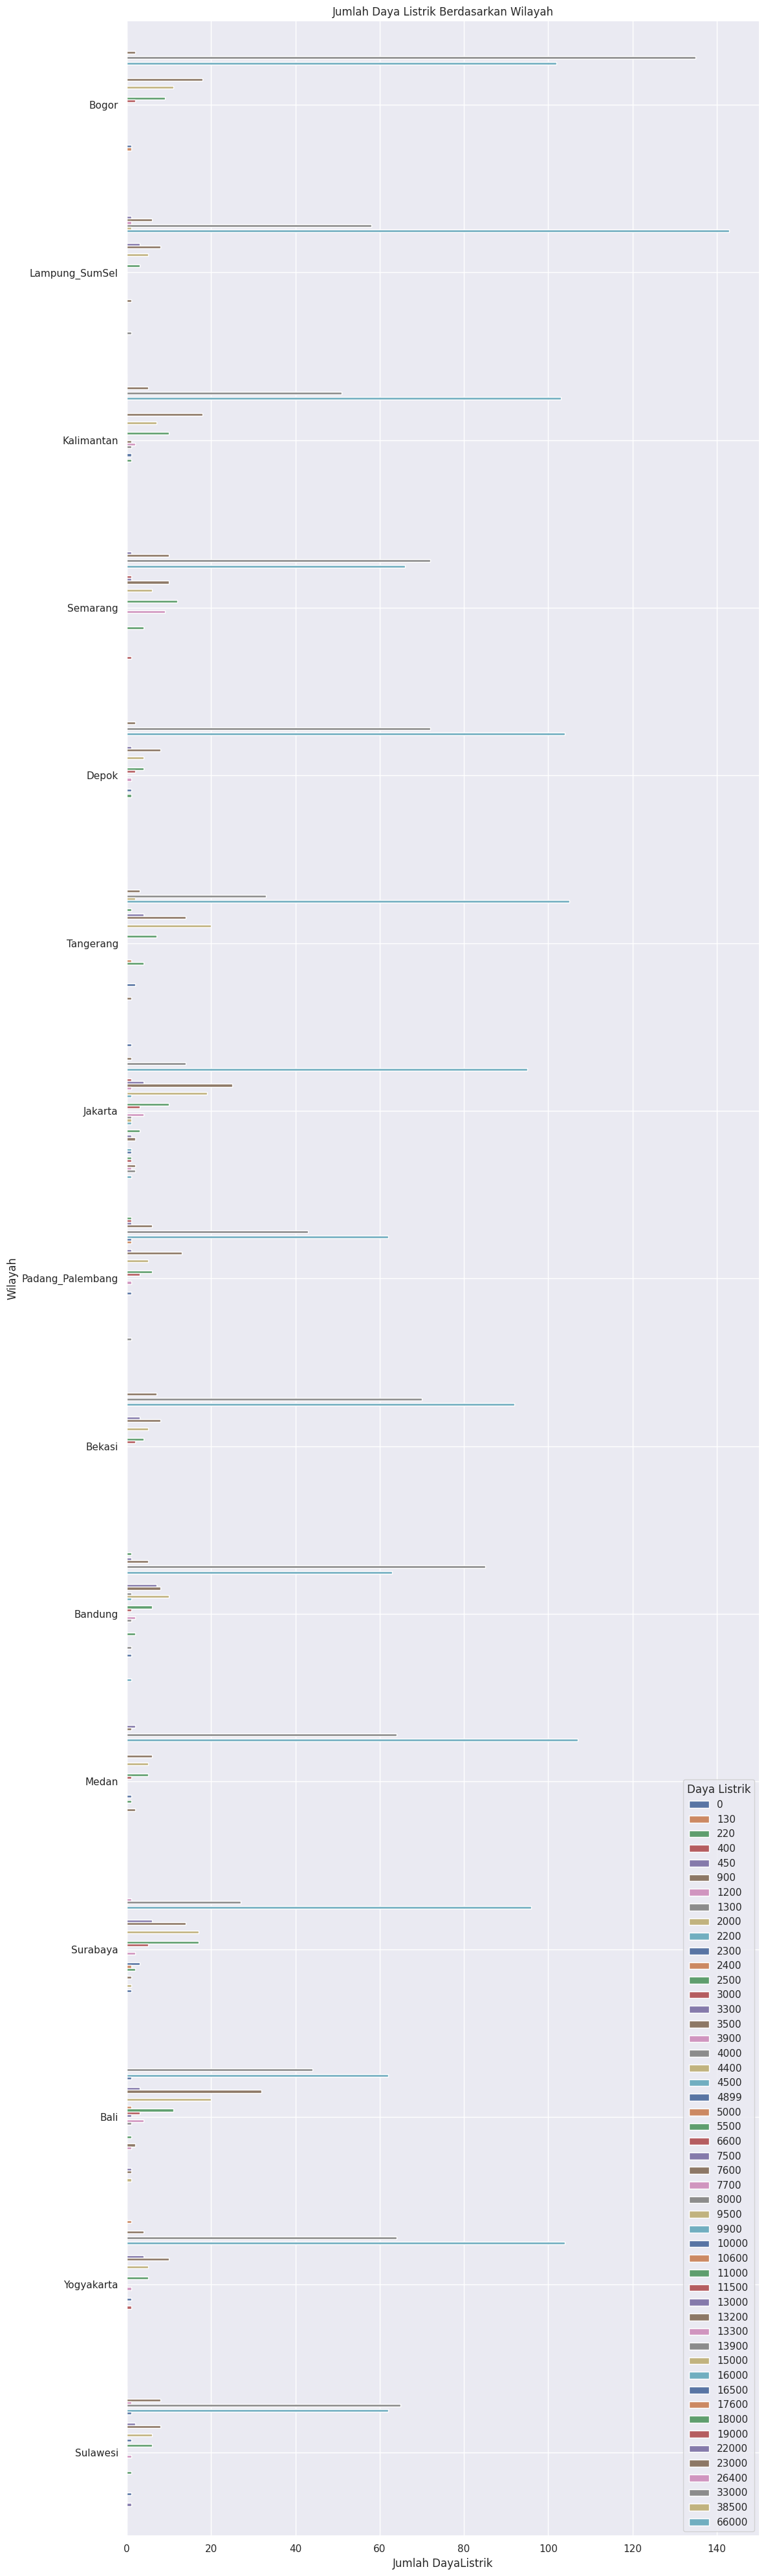

In [ ]:
#Jumlah Daya Listrik
plt.figure(figsize=(12, 40))
sns.countplot(y='wilayah', hue='listrik', palette='deep', data=combined_dataD)
plt.xlabel('Jumlah DayaListrik')
plt.ylabel('Wilayah')
plt.title('Jumlah Daya Listrik Berdasarkan Wilayah')
plt.legend(title='Daya Listrik')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari grafik di atas, dapat disimpulkan beberapa hal, yaitu:

*   Rumah yang banyak dijual adalah rumah dengan jumlah Kamar Tidur (KT) sebanyak 2 KT
*   Rumah yang banyak dijual adalah rumah dengan jumlah Kamar Mandi (KM) sebanyak 2 KM
*   Rumah yang banyak dijual adalah rumah dengan jumlah  carport sebanyak 1 carport
*   Rumah yang banyak dijual adalah rumah dengan Sertifikat Hak Milik (SHM) dibandingkan rumah yang memiliki sertifikat lainnya.
*   Rumah yang banyak dijual adalah rumah dengan daya listrik antara 1300-2200, sehingga dapat diindikasikan bahwa rumah yang dijual adalah rumah menengah kebawah


#**6. Rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan**##


In [ ]:
#Menambahkan kolom untuk rumah dengan harga di bawah 25Milyar
combined_dataE['harga<25m']=combined_dataE['harga']<25000000000
print(combined_dataE)

    created_at    LT   LB  KT  KM  garasi  carport  \
1   2021-06-12    60   40   1   1       0        1   
2   2021-06-12    60   50   2   2       0        1   
3   2021-06-12    60   70   3   2       0        1   
4   2021-06-12    90   60   3   2       0        2   
5   2021-06-12   120   70   3   2       0        2   
..         ...   ...  ...  ..  ..     ...      ...   
160 2023-09-19  1030  467   2   1       0        1   
161 2023-09-18    96   96   2   1       0        1   
162 2023-09-17   115   45   2   1       0        1   
163 2023-09-14   102   72   2   1       0        1   
164 2023-07-17   127   72   2   1       0        1   

                                         lokasi sertifikat  listrik  \
1                                Babakan Madang        SHM     2200   
2                                Babakan Madang        SHM     2200   
3                                Babakan Madang        SHM     2200   
4                                Babakan Madang        SHM     2200

In [ ]:
#Membuat urutan rumah dengan Luas Tanah dan Luas Bangunan terbesar dan harga termurah
combined_dataE.sort_values(['LT','LB','harga<25m'],ascending=[False,False,True])

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,harga<25m,harga/LT
14,2021-12-05,3422,64,1,1,0,1,Jakarta Pusat,SHM,2200,1050000000,https://www.rumah.com/listing-properti/dijual-...,Vlaster cempaka merupakan suatu kompleks perum...,True,3.068381e+05
70,2021-08-04,2662,378,7,5,2,2,"Kedaton, Bandar Lampung",SHM,2200,2550000000,https://www.rumah123.com/properti/bandar-lampu...,"Pekarangan luas kiri kanan dpn blkg, Parkir : ...",True,9.579264e+05
74,2021-11-24,2500,120,3,2,0,0,"Banyuasin III, Banyuasin",SHM,2200,400000000,https://www.rumah123.com/properti/banyuasin/ho...,Dijual rumah seluas 120m2 dan diatas lahan 2.5...,True,1.600000e+05
103,2021-12-11,2300,250,6,2,0,0,"Jekan Raya, Palangkaraya",SHM,2200,2000000000,https://www.rumah123.com/properti/palangkaraya...,Murah ada 2 rumah bagus siap huni,True,8.695652e+05
13,2021-03-12,2280,225,4,2,0,0,"Balikpapan Timur, Balikpapan",SHM,1300,3000000000,https://www.rumah123.com/properti/balikpapan/h...,Rumah Dijual Balikpapan RUMAH DAN TANAH KEBUN ...,True,1.315789e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2021-12-06,19,35,2,1,0,0,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",True,2.078947e+07
22,2021-12-07,18,33,2,1,0,0,Jakarta Pusat,SHM,2200,425000000,https://www.rumah.com/listing-properti/dijual-...,"Kualitas bangunan & material terbaik, one gate...",True,2.361111e+07
20,2021-12-02,16,32,1,1,0,0,Jakarta Pusat,SHM,2200,380000000,https://www.rumah.com/listing-properti/dijual-...,Sangat cocok untuk huni dan investasi. Lokasi ...,True,2.375000e+07
158,2023-06-07,15,52,2,1,0,1,"Cilandak, Jakarta Selatan",SHM,2200,999000000,https://www.rumah123.com/properti/jakarta-sela...,Sumber air PAM. Carport 1. SHM-Pegang Sendiri....,True,6.660000e+07


* Dari data tabel di atas, diambil data rumah dengan luas tanah dan luas bangunan yang besar tetapi dengan harga rendah. Sehingga dapat dilihat rumah yang paling rekomen untuk diinvestasikan karena berpotensi menghasilkan keuntungan bagi perusahaan adalah rumah di daerah Cempaka Putih, Jakarta Pusat. Dan untuk rumah lainnya dapat dilihat pada tabel di atas.

#**7. Informasi berharga dari data**##


In [ ]:
#Membuat kolom harga rumah per meter untuk luas tanah
combined_dataD['harga/LT'] = combined_dataD['harga']/combined_dataD['LT']
print(combined_dataD['harga/LT'])

1      1.352333e+07
2      1.500833e+07
3      1.669833e+07
4      1.334222e+07
5      1.281833e+07
           ...     
160    2.233010e+06
161    7.031250e+06
162    3.026087e+06
163    1.715686e+06
164    4.724409e+06
Name: harga/LT, Length: 2978, dtype: float64


In [ ]:
#Membuat kolom harga rumah per meter untuk luas bangunan
combined_dataD['harga/LB'] = combined_dataD['harga']/combined_dataD['LB']
print(combined_dataD['harga/LB'])

1      2.028500e+07
2      1.801000e+07
3      1.431286e+07
4      2.001333e+07
5      2.197429e+07
           ...     
160    4.925054e+06
161    7.031250e+06
162    7.733333e+06
163    2.430556e+06
164    8.333333e+06
Name: harga/LB, Length: 2978, dtype: float64


In [ ]:
combined_dataD[["harga/LT", "harga/LB","wilayah"]]

,harga/LT,harga/LB,wilayah
1,1.352333e+07,2.028500e+07,Bogor
2,1.500833e+07,1.801000e+07,Bogor
3,1.669833e+07,1.431286e+07,Bogor
4,1.334222e+07,2.001333e+07,Bogor
5,1.281833e+07,2.197429e+07,Bogor
...,...,...,...
160,2.233010e+06,4.925054e+06,Sulawesi
161,7.031250e+06,7.031250e+06,Sulawesi
162,3.026087e+06,7.733333e+06,Sulawesi
163,1.715686e+06,2.430556e+06,Sulawesi


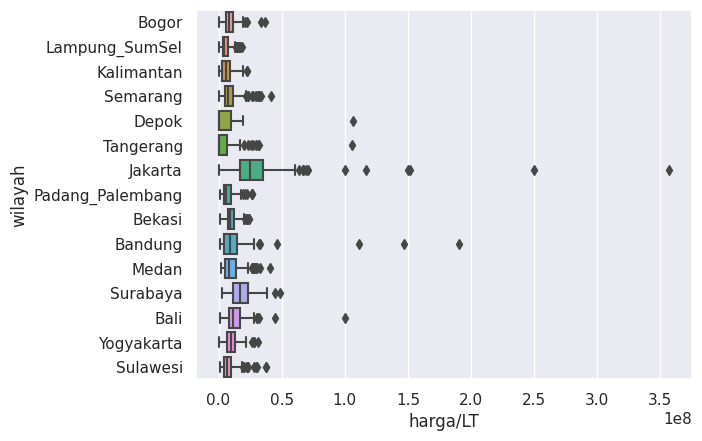

In [ ]:
p = sns.boxplot(x = "harga/LT", y = "wilayah", data = combined_dataD)

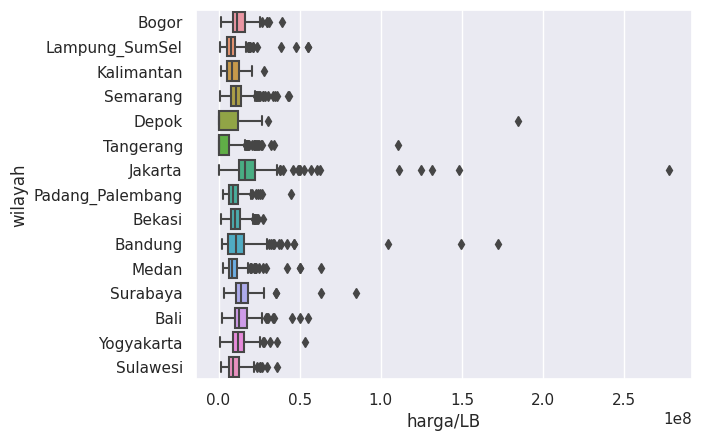

In [ ]:
p = sns.boxplot(x = "harga/LB", y = "wilayah", data = combined_dataD)

* Dari informasi di atas, kita bisa melihat persebaran harga per meter untuk luas tanah dan bangunan di semua wilayah. Terlihat bahwa Kota Jakarta memiliki kecenderungan harga yang lebih mahal

In [154]:
#Mencari rata-rata harga rumah/luas tanah di Jakarta
rata2_jkt=combined_dataD[combined_dataD['wilayah']=='Jakarta']['harga/LT'].mean()
rumah_jkt = combined_dataD[(combined_dataD['wilayah'] == 'Jakarta') & (combined_dataD['harga/LT'] < mean_jkt)]

In [155]:
#Mencetak rumah Jakarta dengan harga termahal
print('Rata-Rata harga/LT di Jakarta:',mean_jkt)
print("Harga/LT Termahal di Wilayah 'Jakarta':", rumah_jkt['harga/LT'].max())
print("Rumah nomor:", rumah_jkt['harga/LT'].idxmax())
print('Harga rumah:',rumah_jkt['harga'][rumah_jkt['harga/LT'].idxmax()])
print('KT:',rumah_jkt['KT'][rumah_jkt['harga/LT'].idxmax()])
print('KM:',rumah_jkt['KM'][rumah_jkt['harga/LT'].idxmax()])
print('garasi:',rumah_jkt['garasi'][rumah_jkt['harga/LT'].idxmax()])
print('carport:',rumah_jkt['carport'][rumah_jkt['harga/LT'].idxmax()])

Rata-Rata harga/LT di Jakarta: 31547198.02448187
Harga/LT Termahal di Wilayah 'Jakarta': 31346153.846153848
Rumah nomor: 139
Harga rumah: 1630000000
KT: 4
KM: 3
garasi: 1
carport: 1


* Didapatkan informasi bahwa harga rumah termahal di Jakarta adalah 31346153.846153848 per meternya, dengan 4 kamar tidur, 3 kamar mandi, dan 1 garasi dan 1 carport.